In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
dir_name = '../daf_metric_results_folder_0817/{}DAF_TPCC_08172020/'
num_daf_threads = [0, 4, 8]
num_threads = [8, 12, 16, 20, 24, 28]
result_filename = '{}daf_{}worker_result.json'
coor_result_filename = '../coor_metric_results_folder_0817/coor_{}worker_result.json'
output_format = 'pdf'

In [3]:
def read_daf_txns_per_second(num_daf_t, num_worker_t):
    try:
        with open(dir_name.format(num_daf_t) + result_filename.format(num_daf_t, num_worker_t)) as f:
            json_data = json.load(f)
        return json_data['benchmarks'][0]['items_per_second']    
    except IOError as error: 
        return np.nan

In [4]:
def read_txns_per_second(filename, num_worker_t):
    try:
        with open(filename.format(num_worker_t)) as f:
            json_data = json.load(f)
        return json_data['benchmarks'][0]['items_per_second']    
    except IOError as error: 
        return np.nan

In [5]:
def change_font_sizes():
    plt.rc('font', size=6)          # controls default text sizes
    plt.rc('axes', titlesize=6)     # fontsize of the axes title
    plt.rc('axes', labelsize=6)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
    plt.rc('legend', fontsize=6)    # legend fontsize
    plt.rc('figure', titlesize=6)  # fontsize of the figure title

In [6]:
# read in num txns
ave_num_txns = [[0] * len(num_threads) for _ in range(len(num_daf_threads))]
column_names = ['Cooperative DAF', '4 DAF Threads', '8 DAF Threads']

i = 0
for daf_count in num_daf_threads:
    j = 0
    for total_count in num_threads:
        worker_count = total_count - daf_count
        if daf_count == 0:
            ave_num_txns[i][j] = read_txns_per_second(coor_result_filename, total_count)
        else:
            ave_num_txns[i][j] = read_daf_txns_per_second(daf_count, worker_count)
        j += 1
    i += 1
df = pd.DataFrame(np.transpose(np.array(ave_num_txns)),columns=column_names)
df.insert(loc=0, column='num_threads', value=num_threads)
print(df)

   num_threads  Cooperative DAF  4 DAF Threads  8 DAF Threads
0            8    139673.826696   87654.230358            NaN
1           12    187494.707961  161267.563046   80255.694643
2           16    227264.979603  153471.903129  142665.054552
3           20    228917.093382  121744.106063  178144.936508
4           24    216348.570138  124448.343826  177993.743520
5           28    223926.484913  119699.506239  180037.245205


[6.0, 4.0]


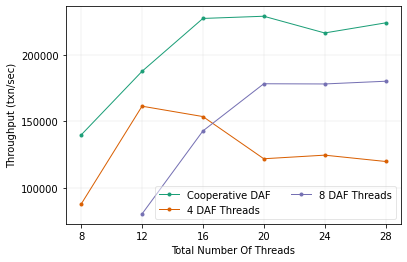

In [7]:
# draw only num_txns
# change_font_sizes()
colors = ['#1b9e77', '#d95f02', '#7570b3']
ax = plt.gca()
ax.set_xticks(num_threads)
plt.locator_params(axis='y', nbins=5)
plt.grid(linestyle='-', linewidth='0.3', color='lightgrey')

i = 0
for col in column_names:
    plt.plot( 'num_threads', col, data=df, marker='.', color=colors[i], linewidth=1.)
    i += 1
plt.xlabel('Total Number Of Threads')
plt.ylabel('Throughput (txn/sec)')
plt.legend(loc='best', ncol=2, framealpha=0.5)

# plt.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=3, mode='expand', borderaxespad=0.)
# use below if y axis labels in scientific notations
# plt.legend(loc='lower left', bbox_to_anchor=(0.08, 1.02, 0.92, .102), fancybox=True, shadow=True, ncol=2, mode='expand', borderaxespad=0.)
plt.savefig('../metric_figures/coor_vs_multi_same_total_num_threads.' + output_format, format=output_format,  bbox_inches='tight', dpi=600)
# plt.clf()
print(plt.rcParams["figure.figsize"])